Python Einführungskurs | [Startseite](index.ipynb)

---

# 04 - Numerik mit Numpy

- [Numpy Arrays erstellen](#Numpy-Arrays-erstellen)
- [Aufgabe 1 - Numpy Arrays](#Aufgabe-1---Numpy-Arrays)
- [Aufgabe 2 - Slicing](#Aufgabe-2---Slicing)
- [Funktionen auf Arrays anwenden](#Funktionen-auf-Arrays-anwenden)
- [Daten einlesen und speichern](#Daten-einlesen-und-speichern)
- [Aufgabe 3 - Temperaturen in Heidelberg](#Aufgabe-3---Temperaturen-in-Heidelberg)

Python Listen sind sehr flexibel, da sie Werte unterschiedlicher Datentypen beinhalten können und einfach verändert werden können (bspw. mit `append`). Diese Flexibilität geht jedoch auf Kosten der Performance, sodass Listen für numerische Berechnungen nicht ideal sind.

Das **Numpy** Modul definiert daher den n-dimensionalen **Array** Datentyp `numpy.ndarray`, der für numerische Berechnungen auf höchst performanten C und Fortran Code zurückgreift.

Arrays können nur Werte eines einzelnen numerischen Datentyps (bspw. floating point Werte) enthalten und sind sehr viel starrer als Listen. Dies ist jedoch für viele wissenschaftliche Anwendung, wie die Arbeit mit Datensätzen, genau was wir brauchen!

Wir importieren das Numpy Modul per Konvention unter der Abkürzung `np`:

In [1]:
import numpy as np # Das Numpy Modul wird per Konvention als `np` abgekürzt

## Numpy Arrays erstellen

Am einfachsten erstellen wir Numpy Arrays aus Python Listen, indem wir die `numpy.array` Funktion verwenden:

In [2]:
a = np.array([ 1, 2, 3, 5, 8, 13 ])
a

array([ 1,  2,  3,  5,  8, 13])

In [3]:
b = np.array([ [ 1.5, 2.2, 3.1 ], [ 4.0, 5.2, 6.7 ] ])
b

array([[1.5, 2.2, 3.1],
       [4. , 5.2, 6.7]])

Numpy Arrays haben einige **Attribute**, die hilfreiche Informationen über das Array geben:

In [4]:
a.ndim, b.ndim # Die Zahl der Dimensionen des Arrays

(1, 2)

In [5]:
a.shape, b.shape # Die Länge des Arrays in jeder Dimension

((6,), (2, 3))

In [6]:
a.dtype, b.dtype # Der Datentyp des Arrays

(dtype('int32'), dtype('float64'))

> **Erinnerung:** Verwendet die `<TAB>`-Autovervollständigung und die `?`-Dokumentation im Jupyter Notebook wenn ihr nicht wisst, welche Funktionen es gibt oder was diese bewirken!

### Es gibt viele Möglichkeiten, Arrays zu erstellen

- Die `numpy.arange` Funktion arbeitet ähnlich wie Python's `range` Funktion, kann jedoch auch floating-point Argumente annehmen:

In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.arange(1.5, 2, 0.1)

array([1.5, 1.6, 1.7, 1.8, 1.9])

- Außerdem sehr hilfreich sind `numpy.linspace` und `numpy.logspace`, welche eine Anzahl von Werten in linearem oder logarithmischem Abstand zwischen zwei Zahlen generiert:

In [9]:
np.linspace(10, 20, 4)

array([10.        , 13.33333333, 16.66666667, 20.        ])

In [10]:
np.logspace(1, 3, 4)

array([  10.        ,   46.41588834,  215.443469  , 1000.        ])

- Wir können mit `numpy.zeros` und `numpy.ones` Arrays erstellen, die mit Nullen oder Einsen gefüllt sind. Indem wir dem Argument `shape` dieser Funktionen statt einem Integer einen Tupel übergeben, können wir auch mehrdimensionale Arrays erzeugen:

In [11]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [12]:
np.ones((5, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

## Mit Arrays rechnen

Arrays können mit den Standardoperatoren `+-*/**` **elementweise** kombiniert werden:

In [13]:
x = np.array([1,2,3])
y = np.array([4,5,6])

In [14]:
x + 2 * y

array([ 9, 12, 15])

In [15]:
x ** y

array([  1,  32, 729])

> **Achtung:** Für Python-Listen sind diese Operatoren völlig anders definiert!

## Funktionen auf Arrays anwenden

Während Funktionen aus dem `math` Modul wie `sin` oder `exp` auf Zahlen anwendbar sind, sind die gleichnamigen Funktionen aus dem `numpy` Modul auf Arrays anwendbar. **Die Funktion wird auf alle Element des Arrays** angewendet und ist typischerweise um einiges schneller als jedes Element einzeln zu berechnen:

In [16]:
phi = np.linspace(0, 2*np.pi, 10) # 10 Werte zwischen 0 und 2π
np.sin(phi) # Der Sinus jedes dieser Werte

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

Außerdem gibt es viele Funktionen, die Eigenschaften eines Arrays berechnen:

In [17]:
x = np.linspace(0, 10, 100)
np.sum(x), np.mean(x), np.std(x)

(500.0, 5.0, 2.9157646512850626)

Diese Funktionen generalisieren auf mehrere Dimensionen, indem die Achse angegeben wird, auf der die Berechnung durchgeführt werden soll:

In [18]:
x = np.array([ [ 1, 2 ], [ 3, 4 ] ])
np.sum(x), np.sum(x, axis=0), np.sum(x, axis=1)

(10, array([4, 6]), array([3, 7]))

## Aufgabe 1 - Numpy Arrays

a) Erstelle ein Array `a`, das 11 Werte zwischen $10^{-20}$ und $10^{-10}$ in logarithmischem Abstand enthält.

In [19]:
a = np.logspace(-20, -10, 11)

In [20]:
from numpy.testing import assert_array_equal
try:
    a
except NameError:
    raise NameError("Es gibt keine Variable 'a'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_equal(a, [1.00000000e-20, 1.00000000e-19, 1.00000000e-18, 1.00000000e-17, 1.00000000e-16, 1.00000000e-15, 1.00000000e-14, 1.00000000e-13, 1.00000000e-12, 1.00000000e-11, 1.00000000e-10])
print("Jup.")

Jup.


b) Erstelle ein Array `b`, das 2x10 Nullen enthält.

**Hinweis:** Verwende die passende Funktion, die `numpy` bereitstellt.

In [21]:
b = np.zeros((2, 10))

In [22]:
from numpy.testing import assert_array_equal
try:
    b
except NameError:
    raise NameError("Es gibt keine Variable 'b'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_equal(b, [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print("Gut.")

Gut.


c) Erstelle ein Array `c`, das der Einheitsmatrix in 3 Dimensionen entspricht.

**Hinweis:** Auch hier stellt `numpy` bereits eine passende Funktion bereit.

In [23]:
c = np.identity(3)

In [24]:
from numpy.testing import assert_array_equal
try:
    c
except NameError:
    raise NameError("Es gibt keine Variable 'c'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_equal(c, [[1,0,0],[0,1,0],[0,0,1]])
print("Richtig.")

Richtig.


d) Erstelle ein Array `d`, das $100$ Werte zwischen $-5$ und $5$ in linearem Abstand enthält. Dies wird eine Raumachse darstellen.

In [25]:
d = np.linspace(-5, 5, 100)

In [26]:
from numpy.testing import assert_array_almost_equal
try:
    d
except NameError:
    raise NameError("Es gibt keine Variable 'd'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_almost_equal(d[:5], [-5., -4.8989899, -4.7979798, -4.6969697, -4.5959596], 4)
print("Stimmt.")

Stimmt.


e) Erstelle zwei zweidimensionale Arrays `x` und `y`, die jeweils in einer Richtung konstant sind und in der anderen die Raumachse `d` enthalten. So können wir gleich mit Koordinaten arbeiten.

**Hinweis:** Versuche, die Funktion `numpy.meshgrid` zu verstehen. Schreib dann `x, y = np.meshgrid(d, d)`.

In [27]:
#np.meshgrid?
### BEGIN SOLUTION
X= np.linspace(0, 5, 6)
Y= np.linspace(1, 7, 7)
x, y = np.meshgrid(X, Y)
### END SOLUTION
print(x)
print(y)

[[0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]]
[[1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7. 7.]]


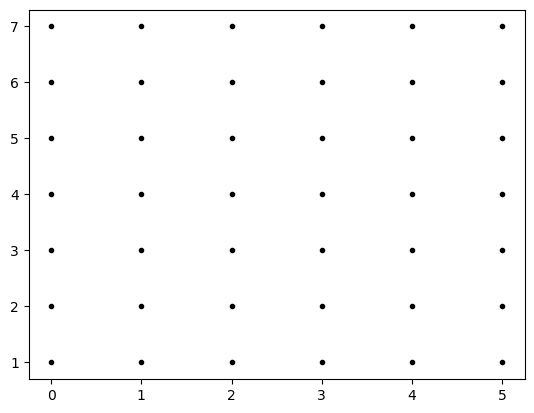

In [28]:
# Zeige Plots direkt im Jupyter Notebook an
%matplotlib inline
#%matplotlib notebook
# Anschließend können wir das Modul importieren
import matplotlib.pyplot as plt # Die Abkürzung `plt` ist Konvention

plt.plot(x,y, marker='.', color='k', linestyle='none')
from mpl_toolkits.mplot3d import Axes3D  
plt.show()

In [29]:
#%matplotlib notebook

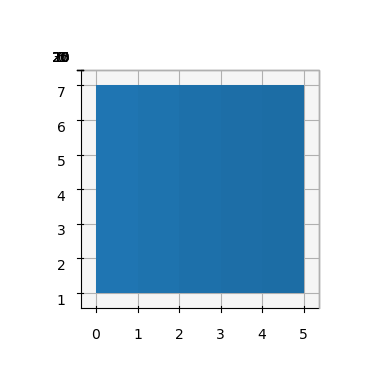

In [30]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho')# https://stackoverflow.com/questions/23840756/how-to-disable-perspective-in-mplot3d/49856771#49856771


def fun(x, y):
    return x**2 + y

zs = np.array(fun(np.ravel(x), np.ravel(y)))
Z = zs.reshape(x.shape)

ax.plot_surface(x, y, Z)
ax.view_init(azim=-90, elev=90)# xy-axes as above => z-axis point out of display plane

C:\Users\rgrothau\AppData\Local\Temp\ipykernel_2440\3865708391.py:15: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  fun = interp2d(x, y, Z, kind='linear') # https://stackoverflow.com/questions/8661537/how-to-perform-bilinear-interpolation-in-python#65052384
C:\Users\rgrothau\AppData\Local\Temp\ipykernel_2440\3865708391.py:16: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible repla

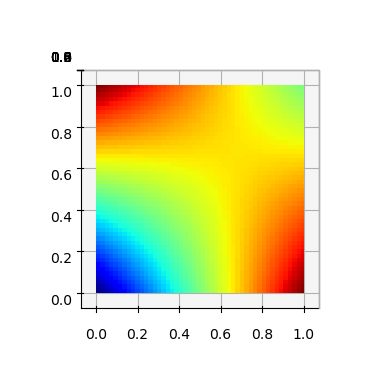

In [31]:
## based on matlab code from: https://en.wikipedia.org/wiki/File:Bilininterp.png
# Grid of known points:
x= (0,1)
y= (0,1)
X, Y = np.meshgrid(x, y)
# Grid for interpolated values:
xi= np.linspace(0, 1, 1001)
yi= np.linspace(0, 1, 1001)
XI, YI = np.meshgrid(xi, yi)
# Known values to interpolate from:
Z = (0, 1, 1, 0.5)
# Do bilinear interpolation
# matlab: ZI = interp2(X,Y,Z,XI,YI);
from scipy.interpolate import interp2d
fun = interp2d(x, y, Z, kind='linear') # https://stackoverflow.com/questions/8661537/how-to-perform-bilinear-interpolation-in-python#65052384
zi = fun(xi, yi)
ZI = zi.reshape(XI.shape)
# Visualize result:

%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho')# https://stackoverflow.com/questions/23840756/how-to-disable-perspective-in-mplot3d/49856771#49856771

ax.plot_surface(XI,YI,ZI, cmap='jet') # cmap jet for looking similar to matlab result: https://matplotlib.org/2.0.2/users/colormaps.html?highlight=colormap
ax.view_init(azim=-90, elev=90)# xy-axes as above => z-axis point out of display plane

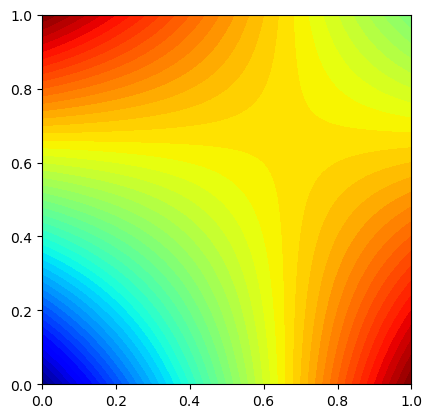

In [32]:
# using countour plot to look like 2D matlab result
fig, axs = plt.subplots(1, 1)
axs.contourf(XI,YI,ZI, 50, cmap='jet') # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html
axs.set_aspect('equal', 'box') # https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html

In [33]:
#np.meshgrid?
### BEGIN SOLUTION
x, y = np.meshgrid(d, d)
### END SOLUTION

In [34]:
from numpy.testing import assert_array_almost_equal
try:
    x, y
except NameError:
    raise NameError("Es gibt keine Variable 'x' oder 'y'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_almost_equal(x[:5,0], [-5, -5, -5, -5, -5], 4)
assert_array_almost_equal(x[0,:5], [-5., -4.8989899, -4.7979798, -4.6969697, -4.5959596], 4)
assert_array_almost_equal(y[0,:5], [-5, -5, -5, -5, -5], 4)
assert_array_almost_equal(y[:5,0], [-5., -4.8989899, -4.7979798, -4.6969697, -4.5959596], 4)
print("Alles klar? 😉")

Alles klar? 😉


f) Berechne aus `x` und `y` ein zweidimensionales Array `r`, dessen Werte den Abstand zum Ursprung $r=\sqrt{x^2+y^2}$ darstellen.

**Erinnerung:** Mathematische Operationen und Funktionen werden elementweise auf Numpy Arrays angewendet, du kannst also einfach mit ihnen rechnen. Denk' daran, die Funktionen aus dem `numpy` Modul zu verwenden, wie bspw. `np.sqrt`.

In [35]:
r = np.sqrt(x**2 + y**2)

In [36]:
from numpy.testing import assert_array_almost_equal
try:
    r
except NameError:
    raise NameError("Es gibt keine Variable 'r'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_almost_equal(r[0,:3], [ 7.07106781, 7.00000729, 6.92969048], 4)
print("👍")

👍


g) Berechne schließlich für jeden Punkt des zweidimensionalen Raums den Wert $E = \frac{x}{r}\sin{\!(\pi r)}$. Kommt's dir bekannt vor?

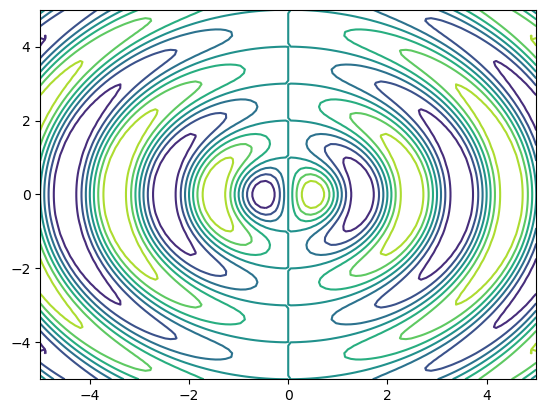

In [37]:
### BEGIN SOLUTION
E = x/r*np.sin(r*np.pi)
### END SOLUTION
%matplotlib inline
import matplotlib.pyplot as plt
plt.contour(x, y, E)

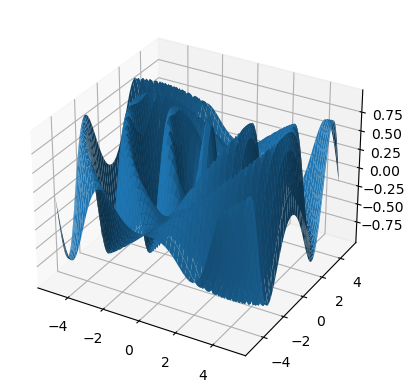

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(x, y, E)

In [39]:
from numpy.testing import assert_array_almost_equal
try:
    E
except NameError:
    raise NameError("Es gibt keine Variable 'E'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_almost_equal(E[0,:3], [ 1.56564647e-01, 1.60235697e-05, -1.51695015e-01 ], 4)
print("Sehr gut! 👏")

Sehr gut! 👏


## Numpy Arrays sind Reihen

Wir können alle Funktionen auf Numpy Arrays anwenden die für Reihen definiert sind:

In [40]:
a = np.arange(3)
len(a)

3

In [41]:
for x in a:
    print(x)

0
1
2


In [42]:
a[0]

0

### Slicing wählt Teile eines Arrays aus

Die **[Slicing](101%20-%20Grundlagen%20der%20Programmierung%20in%20Python.ipynb#Slicing)** Syntax von Reihen haben wir schon kennengelernt. Sie erlaubt uns, auf einzelne Elemente oder Teile einer Reihe zuzugreifen:

```python
a[start:stop:step]
```

Numpy erweitert diese Syntax auf mehrdimensionale Arrays:

```python
b[start:stop:step, start:stop:step]
```

In [43]:
x = np.arange(10)

In [44]:
x[:5]

array([0, 1, 2, 3, 4])

In [45]:
x[::2]

array([0, 2, 4, 6, 8])

Alternativ können wir statt einem Index auch eine **Liste von Indizes** in das Subskript schreiben und erhalten die zugehörigen Elemente aus dem Array:

In [46]:
x = np.array([ 1, 6, 4, 7, 9 ])
indices = [ 1, 0, 2, 1 ]
x[indices]

array([6, 1, 4, 6])

### Masking filtert ein Array

Außerdem erweitert Numpy diese Syntax um die **Masking** Funktionalität. Dabei geben wir im Subskript ein **Array von Booleans** an, welches die gleiche Länge hat, und erhalten nur die Elemente, für die wir `True` angegeben haben:

In [47]:
x = np.array([ 1, 6, 4, 7, 9 ])
mask = np.array([ True, True, False, False, True ])
x[mask]

array([1, 6, 9])

Masking ist deshalb äußerst praktisch, weil die **Vergleichsoperatoren** in Kombination mit Numpy Arrays wiederum Boolean Arrays zurückgeben:

In [48]:
x > 4

array([False,  True, False,  True,  True])

Somit können wir Teile eines Arrays herausfiltern, die einer **Bedingung** entsprechen:

In [49]:
x[x > 4]

array([6, 7, 9])

Bedingungen werden mit dem `&` Operator kombiniert:

In [50]:
x[(x > 4) & (x < 8)]

array([6, 7])

### Slices oder Masken eines Arrays kann auch zugewiesen werden

Wenn ein Slice oder eine Maske eines Arrays auf der linken Seite einer Zuweisung steht, wird diesem Teil des Original-Arrays zugewiesen:

In [51]:
x = np.array([ 1, 6, 4, 7, 9 ])
x[x > 4] = 0
x

array([1, 0, 4, 0, 0])

## Aufgabe 2 - Masken & Slicing

a) Gegeben ein Array `x` der Länge `n`, berechne das Array `dx` der Länge `n-1` mit den Werten `dx[i] = x[i+1] - x[i]`. Verwende keine Schleifen sondern Slicing!

**Hinweis:** Du musst zwei Arrays subtrahieren, von denen das eine der um 1 versetzte hintere und das andere der vordere Teil von `x` ist.

**Erinnerung:** Mit negativen Zahlen im Subskript wählst du Indizes vom Ende einer Reihe aus.

In [52]:
x = np.array([ 1, 1, 2, 3, 5, 8 ])
### BEGIN SOLUTION
dx = x[1:] - x[:-1]
### END SOLUTION

In [53]:
from numpy.testing import assert_array_equal
try:
    dx
except NameError:
    raise NameError("Es gibt keine Variable 'dx'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_equal(dx, [0, 1, 1, 2, 3])
print("EZ 😉")

EZ 😉


b) Erstelle eine Maske `binary_donut`, die nur für Werte von `r` zwischen $5$ und $2$ `True` ist, und sonst `False`.

In [54]:
x, y = np.meshgrid(np.arange(-5, 6), np.arange(-5, 6))
r = np.sqrt(x**2 + y**2)
### BEGIN SOLUTION
binary_donut = (r > 2) & (r < 5)
### END SOLUTION
print(binary_donut)

[[False False False False False False False False False False False]
 [False False False  True  True  True  True  True False False False]
 [False False  True  True  True  True  True  True  True False False]
 [False  True  True  True  True False  True  True  True  True False]
 [False  True  True  True False False False  True  True  True False]
 [False  True  True False False False False False  True  True False]
 [False  True  True  True False False False  True  True  True False]
 [False  True  True  True  True False  True  True  True  True False]
 [False False  True  True  True  True  True  True  True False False]
 [False False False  True  True  True  True  True False False False]
 [False False False False False False False False False False False]]


In [55]:
from numpy.testing import assert_array_equal
try:
    binary_donut
except NameError:
    raise NameError("Es gibt keine Variable 'binary_donut'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_equal(binary_donut[1,:], [False, False, False, True, True, True, True, True, False, False, False])
print("mhm 🍩!")

mhm 🍩!


c) Wähle aus `z` solche Werte, die der Maske `binary_donut` entsprechen, und weise sie der Variable `n` zu.

In [56]:
z = x + y
print(z)
### BEGIN SOLUTION
n = z[binary_donut]
### END SOLUTION
print(n)

[[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0]
 [ -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1]
 [ -8  -7  -6  -5  -4  -3  -2  -1   0   1   2]
 [ -7  -6  -5  -4  -3  -2  -1   0   1   2   3]
 [ -6  -5  -4  -3  -2  -1   0   1   2   3   4]
 [ -5  -4  -3  -2  -1   0   1   2   3   4   5]
 [ -4  -3  -2  -1   0   1   2   3   4   5   6]
 [ -3  -2  -1   0   1   2   3   4   5   6   7]
 [ -2  -1   0   1   2   3   4   5   6   7   8]
 [ -1   0   1   2   3   4   5   6   7   8   9]
 [  0   1   2   3   4   5   6   7   8   9  10]]
[-6 -5 -4 -3 -2 -6 -5 -4 -3 -2 -1  0 -6 -5 -4 -3 -1  0  1  2 -5 -4 -3  1
  2  3 -4 -3  3  4 -3 -2 -1  3  4  5 -2 -1  0  1  3  4  5  6  0  1  2  3
  4  5  6  2  3  4  5  6]


In [57]:
from numpy.testing import assert_array_equal
try:
    n
except NameError:
    raise NameError("Es gibt keine Variable 'n'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_equal(n[:10], [-6, -5, -4, -3, -2, -6, -5, -4, -3, -2])
print("👌")

👌


## Daten einlesen und speichern

Mit der `numpy.loadtxt` Funktion können wir Daten aus einer Datei als Numpy Array einlesen:

In [58]:
data = np.loadtxt('data/temperatures.txt')
data.shape

(6679, 2)

Die Funktion gibt ein zweidimensionales Array mit den _Zeilen_ der eingelesenen Datei zurück. Alle Werte einer _Spalte_ können wir durch Slicing erhalten:

In [59]:
date = data[:,0] # Alle Zeilen, jeweils erste Spalte
T = data[:,1] # Alle Zeilen, jeweils zweite Spalte
date, T

(array([1995.00274, 1995.00548, 1995.00821, ..., 2013.27926, 2013.282  ,
        2013.28474]),
 array([ 0.944444, -1.61111 , -3.55556 , ..., 10.5556  ,  8.94444 ,
        11.1667  ]))

> **Hinweis:** Die `numpy.loadtxt` Funktion kann auch direkt ein Array für jede Spalte zurückgeben, wenn das Argument `unpack=True` übergeben wird:
>
> ```python
> date, T = np.loadtxt('data/temperatures.txt', unpack=True)
> ```
>
> Weitere praktische Optionen, wie die ersten Zeilen zu überspringen u.ä., findet ihr in der Dokumentation. Entfernt das '`#`'-Zeichen in der folgenden Zelle und schaut euch die Optionen mal an:

In [60]:
#np.loadtxt?

Mit der verwandten `np.savetxt` Funktion können wir Daten als Textdatei abspeichern:

In [61]:
#np.savetxt?

> **Hinweis:** Im Jupyter Notebook erhalten wir eine praktische Vorschau auf den Anfang einer Datei mit dem `!head path/to/file` Aufruf. Dies ist sehr hilfreich um die enthaltenen Daten zu prüfen, oder ob es Titelzeilen zu Überspringen gibt.

In [62]:
!more data\temperatures.txt

1995.00274 0.944444
1995.00548 -1.61111
1995.00821 -3.55556
1995.01095 -9.83333
1995.01369 -10.2222
1995.01643 -9.5
1995.01916 -10.2222
1995.02190 -6.61111
1995.02464 -2.94444
1995.02738 1.55556
1995.03012 0.277778
1995.03285 -1.44444
1995.03559 -3.61111
1995.03833 -6.22222
1995.04107 -1.55556
1995.04381 -4.94444
1995.04654 -8.38889
1995.04928 -6.55556
1995.05202 -1.5
1995.05476 -3.22222
1995.05749 -0.833333
1995.06023 6.38889
1995.06297 8.16667
1995.06571 3.61111
1995.06845 6.66667
1995.07118 10
1995.07392 0.5
1995.07666 5.44444
1995.07940 6.94444
1995.08214 4.94444
1995.08487 -0.5
1995.08761 1.61111
1995.09035 3.22222
1995.09309 1
1995.09582 2.77778
1995.09856 5.38889
1995.10130 6.22222
1995.10404 8.83333
1995.10678 7.66667
1995.10951 4.38889
1995.11225 2.55556
1995.11499 5.66667
1995.11773 5.5
1995.12047 4.27778
1995.12320 5.77778
1995.12594 5.72222
1995.12868 5.61111
1995.13142 7.11111
1995.13415 3.22222
1995.13689 5.33333
1995.13963 9.66667
1995.14237 8.88889
1995.14511 3.44444
19

### Berechnungen zwischenspeichern mit `numpy.save`

Die `numpy.loadtxt` und `numpy.savetxt` Funktionen arbeiten mit Textdateien. Wenn ihr ein Numpy Array jedoch nur zwischenspeichern möchtet, bspw. das Ergebnis einer langen numerischen Berechnung, könnt ihr es auch mit `numpy.save` in einer `.npy` Binärdatei speichern:

In [63]:
# lange numerischen Berechnung hier
result = np.random.random(10)
print(result)
# Ergebnis zwischenspeichern
np.save('data/result.npy', result)

[0.58851074 0.53259871 0.74950249 0.7951275  0.68888481 0.97094897
 0.74135894 0.25760664 0.11666942 0.07294947]


Anstatt die Berechnung jedes mal erneut durchführen zu müssen, könnt ihr nun einfach mit `numpy.load` das zwischengespeicherte Ergebnis laden:

In [64]:
result = np.load('data/result.npy')
print(result)

[0.58851074 0.53259871 0.74950249 0.7951275  0.68888481 0.97094897
 0.74135894 0.25760664 0.11666942 0.07294947]


> **Hinweis:** Diese Vorgehensweise kann viel Zeit sparen während ihr an einem Teil eures Programms arbeitet, das die numerische Berechnung nicht betrifft, bspw. die graphische Ausgabe als Plot.

## Aufgabe 3 - Temperaturen in Heidelberg

Die Datei `data/temperatures.txt` enthält Temperaturdaten aus Heidelberg von 1995 bis einschließlich 2012. Schaue dir die Struktur der Daten zunächst an:

In [65]:
!head data/temperatures.txt

Der Befehl "head" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


a) Lies die Daten mithilfe der `numpy.loadtxt` Funktion ein und weise die beiden Spalten zwei Variablen `date` und `T` zu.

In [66]:
date, T = np.loadtxt('data/temperatures.txt', unpack=True)

In [67]:
from numpy.testing import assert_array_almost_equal
try:
    date
except NameError:
    raise NameError("Es gibt keine Variable 'date'. Weise das Array einer Variablen mit diesem Namen zu.")
try:
    T
except NameError:
    raise NameError("Es gibt keine Variable 'T'. Weise das Array einer Variablen mit diesem Namen zu.")

assert_array_almost_equal(date[:3], [ 1995.00274, 1995.00548, 1995.00821], 4, "Das Array 'date' enthält nicht die richtigen Daten. Verwende die 'unpack=True' Funktion von 'numpy.loadtxt' wie im Hinweis oben.")
assert_array_almost_equal(T[:3], [ 0.944444, -1.61111, -3.55556], 4, "Das Array 'T' enthält nicht die richtigen Daten. Verwende die 'unpack=True' Funktion von 'numpy.loadtxt' wie im Hinweis oben.")
print("Daten eingelesen!")

Daten eingelesen!


b) Berechne für jedes Jahr von 1995 bis einschließlich 2012 die Durchschnittstemperatur, die minimale und die maximale Temperatur. Füge dabei der Liste `yearly_temperatures` für jedes Jahr eine Zeile mit dem Jahr und diesen drei Werten hinzu.

Die Datei enthält fehlerhafte Daten, die durch den Wert `+/-99` gekennzeichnet sind und nicht in die Berechnung mit einbezogen werden dürfen.

**Hinweis:** Gehe die Jahre in einer for-Schleife durch und verwende eine Maske für das Array `T`, sodass du nur die Temperaturdaten des entsprechenden Jahres als Slice erhälst. Darauf kannst du dann die Numpy Funktionen für den Mittelwert, das Minimum und das Maximum anwenden.

**Erinnerung:** Mehrere Masken kannst du mit dem `&`-Operator kombinieren.

In [68]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 154.7/154.7 kB 1.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [69]:
yearly_temperatures = []
### BEGIN SOLUTION
for year in range(1995, 2013):
    temperatures = T[(date >= year) & (date < year + 1) & (np.abs(T) != 99)]
    yearly_temperatures.append([year, np.mean(temperatures), np.min(temperatures), np.max(temperatures)])
### END SOLUTION
from tabulate import tabulate
print(tabulate(yearly_temperatures, headers=["Jahr", "Durchschnitt [°C]", "Minimal [°C]", "Maximal [°C]"]))

  Jahr    Durchschnitt [°C]    Minimal [°C]    Maximal [°C]
------  -------------------  --------------  --------------
  1995              8.7656        -13.2778          25.9444
  1996              7.22983       -15.5             23.8333
  1997              8.54842       -12.8889          21.5556
  1998              9.2457        -12.2222          25.5
  1999              9.11065        -9.83333         25.3333
  2000              9.76545       -16.7778          24.7778
  2001              9.00713       -12.1667          24.5556
  2002              9.88171       -11.1111          25.1111
  2003              9.39833       -14.3333          27.6667
  2004              8.87702       -10.7778          23
  2005              8.22475       -14.1111          25.1111
  2006              9.16377       -11.2778          25.9444
  2007              9.76865        -8.83333         26.2778
  2008              9.66087        -5.11111         24.0556
  2009              9.3723        -10.7778      

In [70]:
from numpy.testing import assert_array_almost_equal
assert_array_almost_equal(yearly_temperatures[0], [ 1995, 8.7656, -13.2778, 25.9444 ], 4, "Die Daten sind nicht richtig. Überprüfe, ob jedes Element der Liste 'yearly_temperatures' wiederum eine Liste mit den Werten Jahr, Durchschnittstemperatur, Minimum und Maximum ist und du die fehlerhaften Werte +/-99 herausgefiltert hast.")
print("Ganz schön warm, oder? ☀️🌴😅")

Ganz schön warm, oder? ☀️🌴😅


c) Berechne diese Daten analog aufgeteilt in Monate statt Jahre, also bspw. die Durschnittstemperatur im Januar im ganzen gemessenen Zeitraum.

**Hinweis:** Den Zeitpunkt innerhalb eines Jahres, wobei `0` dem Jahresanfang und `1` dem Jahresende entspricht, erhälst du mit dem Modulo Operator: `date % 1`

In [71]:
monthly_temperatures = []
### BEGIN SOLUTION
for month in range(0, 12):
    temperatures = T[(date % 1 >= month / 12) & (date % 1 < (month + 1) / 12) & (np.abs(T) != 99)]
    monthly_temperatures.append([month + 1, np.mean(temperatures), np.min(temperatures), np.max(temperatures)])
### END SOLUTION
from tabulate import tabulate
print(tabulate(monthly_temperatures, headers=["Monat", "Durchschnitt [°C]", "Minimal [°C]", "Maximal [°C]"]))

  Monat    Durchschnitt [°C]    Minimal [°C]    Maximal [°C]
-------  -------------------  --------------  --------------
      1            -0.8494         -16.7778          12.2222
      2             0.662865       -15.4444          11.9444
      3             4.47399         -7.66667         16.2778
      4             9.27625         -2.11111         20.7222
      5            13.9793           5.22222         23.1667
      6            17.2042           7.77778         25.1111
      7            18.4592          10.5             26.2778
      8            18.2187           9.5             27.6667
      9            13.7085           3.88889         22.7222
     10             9.38013         -1.44444         20.5
     11             3.74218         -7.11111         14.1667
     12             0.220317       -15.5             11.2778


In [72]:
from numpy.testing import assert_array_almost_equal
assert_array_almost_equal(monthly_temperatures[0][1:], [ -0.8494, -16.7778, 12.2222 ], 4, "Die Daten sind nicht richtig. Überprüfe, ob jedes Element der Liste 'monthly_temperatures' wiederum eine Liste mit den Werten Monat, Durchschnittstemperatur, Minimum und Maximum ist und du die fehlerhaften Werte +/-99 herausgefiltert hast.")
print("👍 Sieht richtig aus.")

👍 Sieht richtig aus.


---

Du kannst jetzt Daten einlesen und mit Numpy analysieren. Lerne in der nächsten Lektion, wie du mit _Matplotlib_ wissenschaftlich plotten kannst.

[Startseite](index.ipynb) | [**>> 05 - Plots mit Matplotlib**](202%20-%20Plots%20mit%20Matplotlib.ipynb)